# Beggar-my-neighbour

A standard 52-card deck is divided equally between two players, and the two stacks of cards are placed on the table face down. The first player lays down his top card face up, and the opponent plays his top card, also face up, on it, and this goes on alternately as long as no ace or face card (king, queen, or jack) appears. These cards are called "penalty cards."

If either player turns up such a card, his opponent has to pay a penalty: four cards for an ace, three for a king, two for a queen, or one for a jack. When he has done so, the player of the penalty card wins the hand, takes all the cards in the pile and places them under his pack. The game continues in the same fashion, the winner having the advantage of placing the first card. However, if the second player turns up another ace or face card in the course of paying to the original penalty card, his payment ceases and the first player must pay to this new card. This changing of penalisation can continue indefinitely. The hand is lost by the player who, in playing his penalty, turns up neither an ace nor a face card. Then, his opponent acquires all of the cards in the pile. When a single player has all of the cards in the deck in his stack, he has won.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from BMN import *

In [ ]:
game = Game()
log = Log(game)

names = ['Corrine', 'Kyle', 'Kyle Junior']
players = [Player(name, game, deck, True) for name, deck in zip(names, Deck.split(Deck.shuffled()))]
players

In [3]:
[p.top_n_cards(5) for p in players]

[[Card(rank='J', suit='D'),
  Card(rank='10', suit='H'),
  Card(rank='K', suit='H'),
  Card(rank='5', suit='D'),
  Card(rank='8', suit='H')],
 [Card(rank='A', suit='D'),
  Card(rank='J', suit='H'),
  Card(rank='2', suit='D'),
  Card(rank='4', suit='H'),
  Card(rank='J', suit='S')]]

In [4]:
penalty = None
while not game.game_ended():
    for player in Player.players:
        penalty = player.move(penalty)

Corrine    plays Card(rank='8', suit='H'), hand sizes: [25, 26]
Kyle       plays Card(rank='J', suit='S'), hand sizes: [25, 25]
Corrine    plays Card(rank='5', suit='D'), hand sizes: [24, 25]
Kyle       collects deck
Kyle       plays Card(rank='4', suit='H'), hand sizes: [24, 27]
Corrine    plays Card(rank='K', suit='H'), hand sizes: [23, 27]
Kyle       plays Card(rank='2', suit='D'), hand sizes: [23, 26]
Kyle       plays Card(rank='J', suit='H'), hand sizes: [23, 25]
Corrine    plays Card(rank='10', suit='H'), hand sizes: [22, 25]
Kyle       collects deck
Kyle       plays Card(rank='A', suit='D'), hand sizes: [22, 29]
Corrine    plays Card(rank='J', suit='D'), hand sizes: [21, 29]
Kyle       plays Card(rank='5', suit='H'), hand sizes: [21, 28]
Corrine    collects deck
Corrine    plays Card(rank='10', suit='D'), hand sizes: [23, 28]
Kyle       plays Card(rank='5', suit='C'), hand sizes: [23, 27]
Corrine    plays Card(rank='4', suit='S'), hand sizes: [22, 27]
Kyle       plays Card(rank=

In [5]:
game.game_deck

deque([Card(rank='3', suit='H'),
       Card(rank='6', suit='D'),
       Card(rank='4', suit='C'),
       Card(rank='10', suit='C'),
       Card(rank='4', suit='H'),
       Card(rank='5', suit='S'),
       Card(rank='J', suit='D'),
       Card(rank='3', suit='D')])

In [6]:
log.counter

Counter({'cards played': 134, 'penalties': 40, 'pickups': 18, 'turns': 100})

## Run 10000 games to see dynamics

In [7]:
all_games_data = []
names = ['Corrine', 'Kyle']

for _ in range(10000):
    game = Game()
    log = Log(game)
    Player.players = []
    [Player(name, game, deck, False) for name, deck in zip(names, Deck.split(Deck.shuffled()))]
    
    penalty = None
    while not game.game_ended():
        for player in Player.players:
            penalty = player.move(penalty)
    all_games_data.append(dict(log.counter))

In [8]:
df = pd.DataFrame.from_dict(all_games_data)
df.describe()

cards played    penalties       pickups         turns
count  10000.000000  10000.00000  10000.000000  10000.000000
mean     224.389000     69.28400     30.725200    167.592300
std      175.086177     54.87765     25.255428    130.160239
min       37.000000      9.00000      2.000000     23.000000
25%      100.000000     30.00000     13.000000     74.000000
50%      172.000000     53.00000     23.000000    130.000000
75%      293.000000     91.00000     41.000000    219.000000
max     2009.000000    633.00000    291.000000   1473.000000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000A7DF240>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000B043198>]], dtype=object)

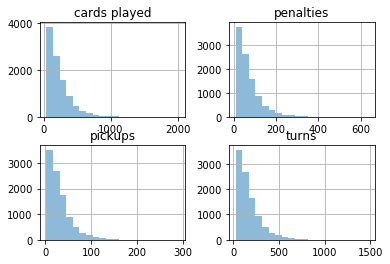

In [9]:
plt.figure()
df.hist(bins=20, alpha = 0.5)